In [1]:
%reset -f

In [2]:
#!/usr/bin/env python3
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import torch
from torch import nn
from torch.utils.data import DataLoader
from torcheval.metrics import BinaryAccuracy
from torcheval.metrics.functional import binary_accuracy
torch.manual_seed(18)
torch.cuda.is_available()
from DiscriminatorV3 import DiscriminatorV3, ConvBlock
from DiscriminatorV4 import DiscriminatorV4, ConvBlock
from FacesDataset import FacesDataset

In [3]:
training_set = FacesDataset('datasets/train.csv')

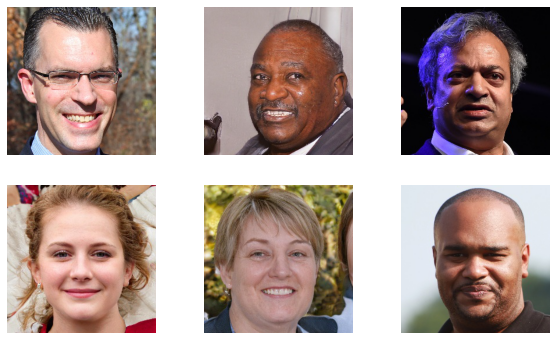

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Read CSV file
df = pd.read_csv('datasets/train.csv')

# Select 6 random images
sample_df = df.sample(n=6, random_state=1)

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Loop over the axes and plot images
for i, axi in enumerate(ax.flat):
    path = sample_df.iloc[i]['path']
    img = Image.open(path)
    axi.imshow(img)
    axi.set_axis_off()

# Show the figure
plt.show()

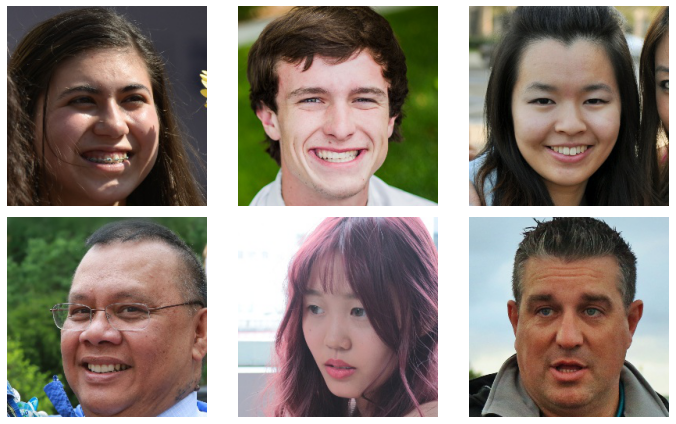

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/train.csv')

# real_images = df[df['label'] == 1].sample(3)['path'].tolist()
fake_images = df[df['label'] == 1].sample(6)['path'].tolist()

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()

for i in range(6):
    img_path = fake_images[i]
    
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

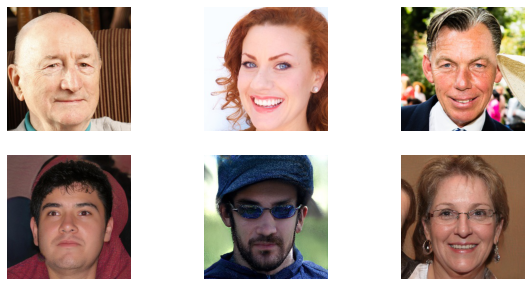

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

df = pd.read_csv('datasets/train.csv')

real_images = df[df['label'] == 1].sample(3)
fake_images = df[df['label'] == 0].sample(3)

fig, axs = plt.subplots(2, 3, figsize=(10, 5))

for i, (idx, row) in enumerate(real_images.iterrows()):
    img = Image.open(row['path'])
    axs[0, i].imshow(img)
    axs[0, i].axis('off')

for i, (idx, row) in enumerate(fake_images.iterrows()):
    img = Image.open(row['path'])
    axs[1, i].imshow(img)
    axs[1, i].axis('off')

plt.show()

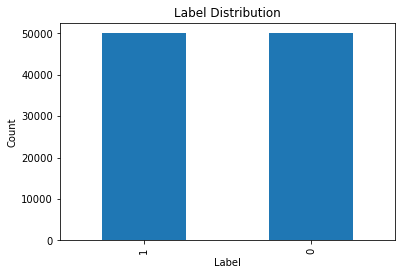

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv('datasets/train.csv')

# Count the number of occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

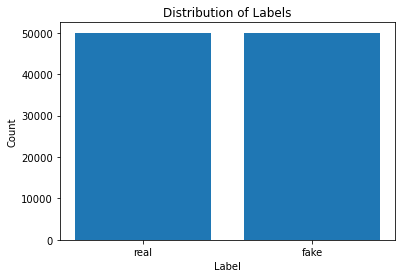

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/train.csv')

df['label'] = df['label'].replace({1: 'real', 0: 'fake'})

label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

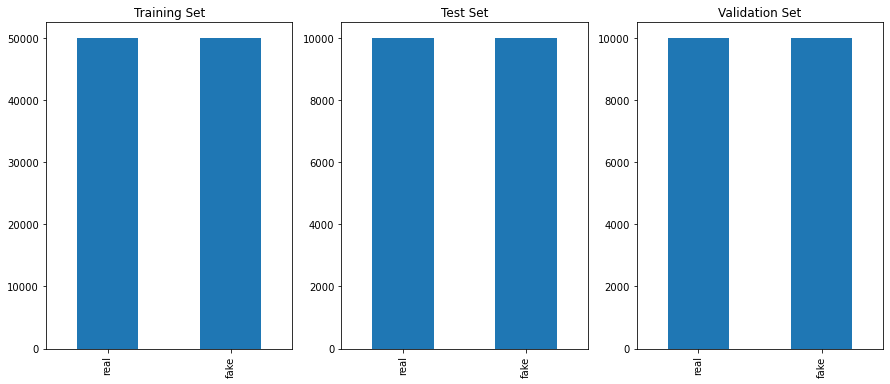

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")
val_df = pd.read_csv("datasets/valid.csv")

# Map the label values to their corresponding names
label_map = {1: "real", 0: "fake"}
train_df["label"] = train_df["label"].map(label_map)
test_df["label"] = test_df["label"].map(label_map)
val_df["label"] = val_df["label"].map(label_map)

# Create the figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Plot the distributions for each dataset
train_df["label"].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Training Set")

test_df["label"].value_counts().plot(kind="bar", ax=axs[1])
axs[1].set_title("Test Set")

val_df["label"].value_counts().plot(kind="bar", ax=axs[2])
axs[2].set_title("Validation Set")

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=1.0)

# Show the figure
plt.show()

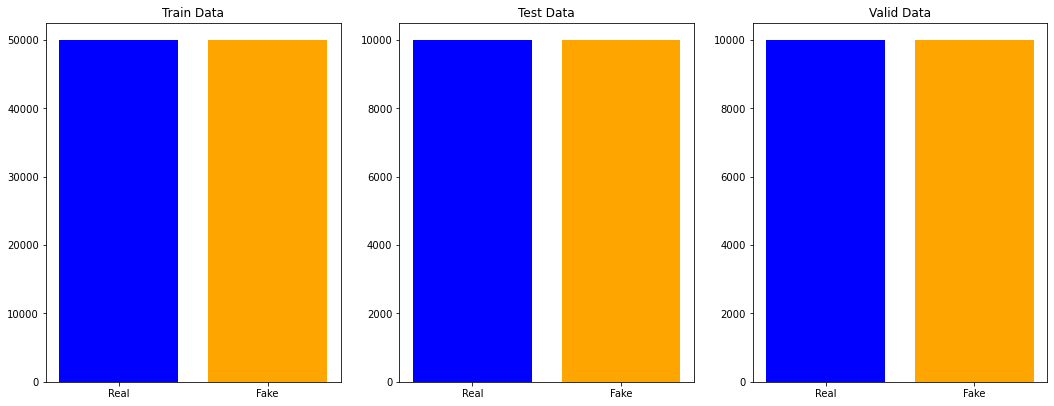

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
valid_data = pd.read_csv('datasets/valid.csv')

# count the number of real and fake images for each dataset
train_counts = train_data['label'].value_counts()
test_counts = test_data['label'].value_counts()
valid_counts = valid_data['label'].value_counts()

# create a figure with three subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# plot the bar chart for the train dataset
axs[0].bar(['Real', 'Fake'], [train_counts[1], train_counts[0]], color=['blue', 'orange'])
axs[0].set_title('Train Data')

# plot the bar chart for the test dataset
axs[1].bar(['Real', 'Fake'], [test_counts[1], test_counts[0]], color=['blue', 'orange'])
axs[1].set_title('Test Data')

# plot the bar chart for the valid dataset
axs[2].bar(['Real', 'Fake'], [valid_counts[1], valid_counts[0]], color=['blue', 'orange'])
axs[2].set_title('Valid Data')

# add some space between the subplots
fig.tight_layout(pad=2)

# show the figure
plt.show()

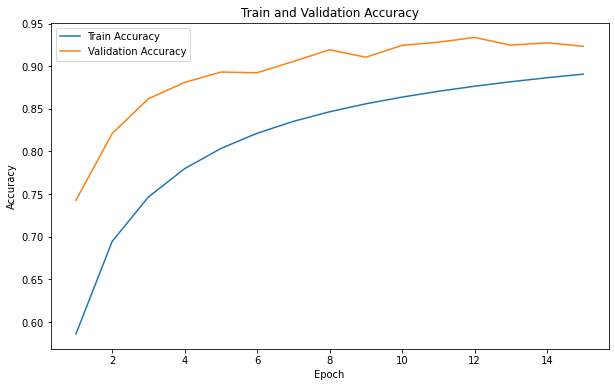

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv("outputs/accuracies.csv")

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df["epoch"], df["train_acc"], label="Train Accuracy")
ax.plot(df["epoch"], df["val_acc"], label="Validation Accuracy")

# set the x and y axis labels
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")

# set the title and legend
ax.set_title("Train and Validation Accuracy")
ax.legend()

# show the plot
plt.show()

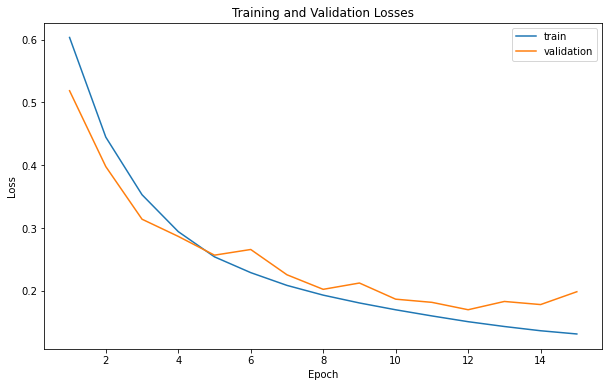

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# read the losses from the CSV file
losses_df = pd.read_csv('outputs/losses.csv')

# plot the train and val losses
plt.plot(losses_df['epoch'], losses_df['train_loss'], label='train')
plt.plot(losses_df['epoch'], losses_df['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.gcf().set_size_inches(10, 6)
plt.show()

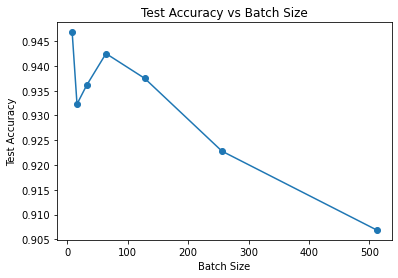

In [13]:
import matplotlib.pyplot as plt

batch_sizes = [512, 256, 128, 64, 32, 16, 8]
test_acc = [0.9069, 0.9228, 0.9375, 0.9425, 0.9361, 0.9323, 0.9468]

plt.plot(batch_sizes, test_acc, '-o')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Batch Size')
plt.show()

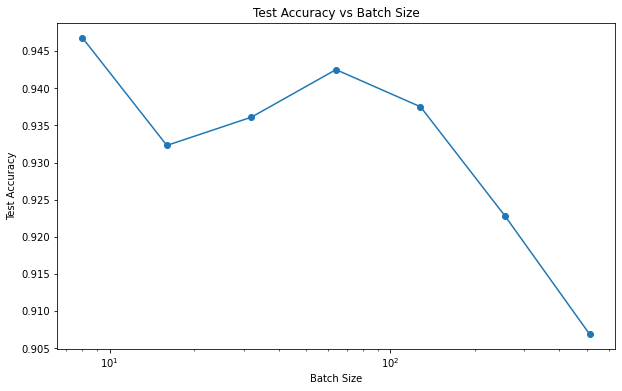

In [14]:
import matplotlib.pyplot as plt

batch_sizes = [512, 256, 128, 64, 32, 16, 8]
test_accs = [0.9069, 0.9228, 0.9375, 0.9425, 0.9361, 0.9323, 0.9468]

plt.semilogx(batch_sizes, test_accs, marker='o')
plt.title('Test Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.gcf().set_size_inches(10, 6)
plt.show()

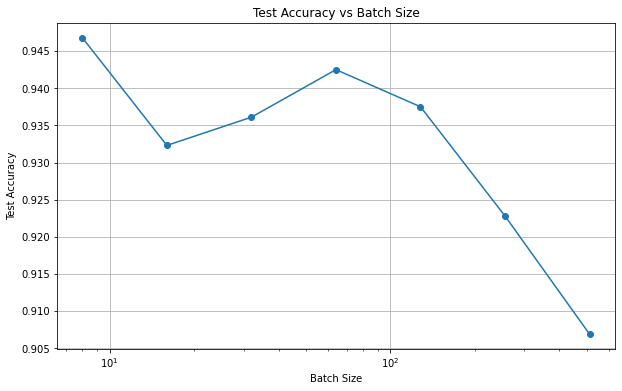

In [15]:
import matplotlib.pyplot as plt

batch_sizes = [512, 256, 128, 64, 32, 16, 8]
test_accs = [0.9069, 0.9228, 0.9375, 0.9425, 0.9361, 0.9323, 0.9468]

plt.plot(batch_sizes, test_accs, marker='o')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Batch Size')
plt.grid(True)
plt.gcf().set_size_inches(10, 6)
plt.show()

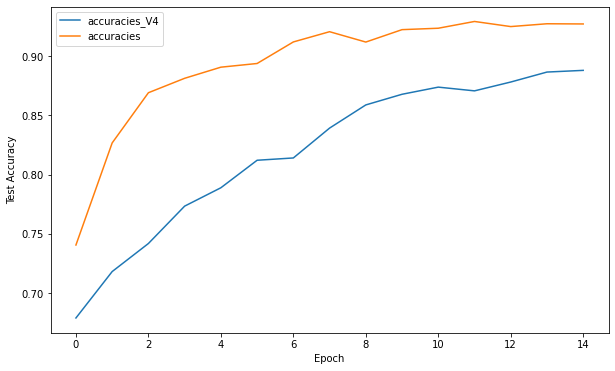

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from accuracies_V4.csv
df_v4 = pd.read_csv('outputs/accuracies_V4.csv')
test_acc_v4 = df_v4['test_acc']

# Load data from accuracies.csv
df = pd.read_csv('outputs/accuracies.csv')
test_acc = df['test_acc']

# Plot test_acc columns from both files on the same plot
plt.plot(test_acc_v4, label='accuracies_V4')
plt.plot(test_acc, label='accuracies')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.gcf().set_size_inches(10, 6)
plt.show()

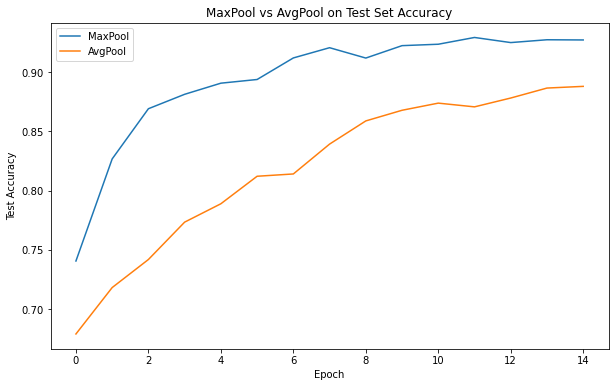

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
df_v4 = pd.read_csv('outputs/accuracies_V4.csv')
df = pd.read_csv('outputs/accuracies.csv')

# create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# plot data on axes
ax.plot(df['test_acc'], label='MaxPool')
ax.plot(df_v4['test_acc'], label='AvgPool')

# set title and labels
ax.set_title('MaxPool vs AvgPool on Test Set Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')

# add legend
ax.legend()

# show plot
plt.show()

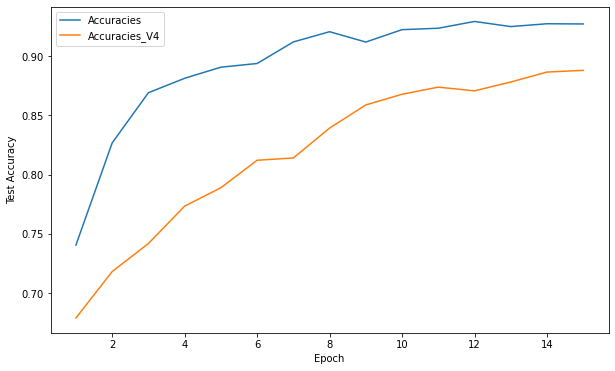

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files
df = pd.read_csv("outputs/accuracies.csv")
df_V4 = pd.read_csv("outputs/accuracies_V4.csv")

# Create a new figure and set its size
plt.figure(figsize=(10, 6))

# Plot the test_acc column from each data frame on the same plot
plt.plot(df["epoch"], df["test_acc"], label="Accuracies")
plt.plot(df_V4["epoch"], df_V4["test_acc"], label="Accuracies_V4")

# Add a legend
plt.legend()

# Add labels for the x and y axes
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")

# Display the plot
plt.show()

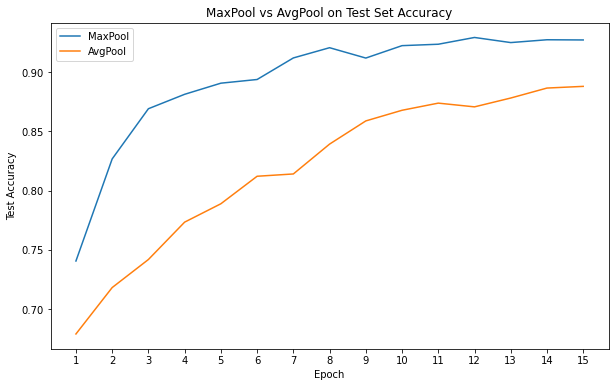

In [19]:
import matplotlib.pyplot as plt

# assuming df and df_V4 are already loaded
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['epoch'], df['test_acc'], label='MaxPool')
ax.plot(df_V4['epoch'], df_V4['test_acc'], label='AvgPool')
ax.legend()
# set title and labels
ax.set_title('MaxPool vs AvgPool on Test Set Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')
ax.set_xticks(range(1, 16))
plt.show()

In [20]:
import torch
import torch.nn as nn
from torchviz import make_dot

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7 * 7 * 128, 512)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

model = MyModel()
x = torch.randn(1, 3, 28, 28)
y = model(x)
# make_dot(y, params=dict(model.named_parameters()))

In [21]:
#!/usr/bin/env python3
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import torch
from torch import nn
from torch.utils.data import DataLoader
from torcheval.metrics import BinaryAccuracy
from torcheval.metrics.functional import binary_accuracy
torch.manual_seed(18)
torch.cuda.is_available()
from DiscriminatorV3 import DiscriminatorV3, ConvBlock
from DiscriminatorV4 import DiscriminatorV4, ConvBlock
from FacesDataset import FacesDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [22]:
def epoch_system_out_string(epoch:int, train_loss:float, train_acc:float, val_loss:float, val_acc:float, test_acc:float)->str:
    return (f'Epoch: {epoch} -- train Loss: {round(train_loss, 4)} \t valid Loss: {round(val_loss, 4)} \t train acc.:{round(train_acc, 4)} \t val acc.:{round(val_acc, 4)} \t test acc.:{round(test_acc, 4)}')

In [23]:
@torch.no_grad()
def estimate_performance(model, data_loader, device='cuda'):
    loss_value = 0.0
    acc_value = 0.0
    loss_fn = nn.BCELoss()
    loss_fn.to(device)
    metric = BinaryAccuracy()
    metric.to(device)
    model.eval()
    for batch in tqdm(data_loader):
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten().float(), targets.float())
        metric.update(outputs.flatten(), targets)
        loss_value += loss.item()
        acc_value += metric.compute().item()
    return loss_value/data_loader.__len__(), acc_value/data_loader.__len__()

In [24]:
def train(model, optimizer, train_loader, val_loader, test_loader, epochs, loss_fn, device='cuda'):
    model.to(device)
    loss_fn.to(device)
    metric = BinaryAccuracy()
    metric.to(device)

    for epoch in (range(epochs)):
        # train the model on the training set
        train_loss = 0.0
        train_acc = 0.0
        model.train()
        # for batch in tqdm(train_loader):
        #     optimizer.zero_grad()
        #     inputs, targets = batch
        #     inputs, targets = inputs.to(device), targets.to(device)
        #     outputs = model(inputs)
        #     loss = loss_fn(outputs.flatten().float(), targets.float())
        #     loss.backward()
        #     optimizer.step()
        #     metric.update(outputs.flatten(), targets)
        #     train_loss += loss.item()
        #     train_acc += metric.compute().item()

        # estimate the performance of the model on the validation set and the test set
        train_loss, train_acc = train_loss / len(train_loader), train_acc / len(train_loader)
        val_loss, val_acc = estimate_performance(model, val_loader, device)
        test_loss, test_acc = estimate_performance(model, test_loader, device)

        print(epoch_system_out_string(epoch, train_loss, train_acc, val_loss, val_acc, test_acc))

In [25]:
batch_size = 8
training_set = FacesDataset('datasets/train.csv')
train_loader = DataLoader(dataset=training_set, batch_size=batch_size, shuffle=True)

valid_set = FacesDataset('datasets/valid.csv')
valid_loader = DataLoader(dataset=valid_set, batch_size=batch_size, shuffle=True)

test_set = FacesDataset('datasets/test.csv')
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

In [26]:
# Load the saved PyTorch model
model = DiscriminatorV3()
model.load_state_dict(torch.load('saved_models/FaceNetV3-Batch-8.pth'))

<All keys matched successfully>

In [27]:
@torch.no_grad()
def get_confusion_matrix(model, data_loader, device='cuda'):
    y_true = []
    y_pred = []
    loss_value = 0.0
    acc_value = 0.0
    loss_fn = nn.BCELoss()
    loss_fn.to(device)
    metric = BinaryAccuracy()
    metric.to(device)
    model.eval()
    for batch in tqdm(data_loader):
        inputs, targets, paths = batch
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten().float(), targets.float())
        metric.update(outputs.flatten(), targets)
        loss_value += loss.item()
        acc_value += metric.compute().item()

        # Append true and predicted labels to lists
        y_true += targets.cpu().numpy().tolist()
        y_pred += (outputs.flatten().cpu().numpy() >= 0.5).astype(int).tolist()

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return cm

In [28]:
device = 'cuda'

loss_fn = nn.BCELoss()

params = model.parameters()
learning_rate = 3e-4
optimizer = torch.optim.Adam(params, lr=learning_rate)

# train the model
num_epochs = 1

In [29]:
model.to(device)
loss_fn.to(device)
metric = BinaryAccuracy()
metric.to(device)

In [30]:
# import seaborn as sns

# cm = get_confusion_matrix(model, test_loader, device)

# # Plot the heatmap
# ax = sns.heatmap(cm, annot=True, cmap="Blues")
# ax.set_xlabel('Predicted Labels')
# ax.set_ylabel('True Labels')
# ax.set_title('Confusion Matrix')
# plt.gcf().set_size_inches(10, 6)

In [31]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from FacesDataset import FacesDataset # replace this with your own dataset module
from tqdm import tqdm
import os
import numpy as np

# define the paths
test_csv = 'datasets/test.csv'
model_path = 'saved_models'
false_positives_csv = 'presentation/false_positives.csv'

# define the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load the test set
test_dataset = FacesDataset(test_csv)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# load the model
# Load the saved PyTorch model
model = DiscriminatorV3()
model.load_state_dict(torch.load('saved_models/FaceNetV3-Batch-8.pth'))
model.to(device)

# evaluate the model and save the false positives
false_positives = []
model.eval()
with torch.no_grad():
    for inputs, targets, paths in tqdm(test_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        preds = (outputs >= 0.5).flatten().cpu().numpy()
        false_positives += list(np.array(paths)[preds & ~targets.cpu().numpy()].tolist())

# save the false positives to a CSV file
df = pd.read_csv(test_csv)
false_positives_df = df[df['path'].isin(false_positives)]
false_positives_df.to_csv(false_positives_csv, index=False)

100%|██████████| 625/625 [00:30<00:00, 20.72it/s]


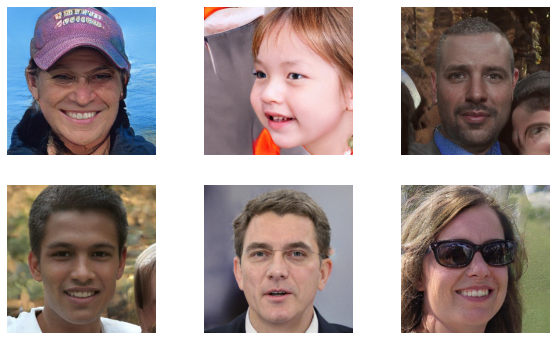

In [41]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Read in the false positives CSV file
false_positives_df = pd.read_csv('presentation/false_positives.csv')
false_positives_df.head()

# Filter for rows where label is 0
label_0_df = false_positives_df[false_positives_df['label'] == 0]
label_0_df.head()

# Take the first 6 rows
rows_to_display = label_0_df.iloc[:6]

# Select 6 random images
sample_df = label_0_df.sample(n=6, random_state=1)

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Loop over the axes and plot images
for i, axi in enumerate(ax.flat):
    path = sample_df.iloc[i]['path']
    img = Image.open(path)
    axi.imshow(img)
    axi.set_axis_off()

# Show the figure
plt.show()